In [86]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.decomposition import PCA
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib import dates

In [2]:
input_folder = '../data/input/'

In [69]:
features = pd.read_csv(os.path.join(input_folder, 'dengue_features_train.csv'))
labels = pd.read_csv(os.path.join(input_folder, 'dengue_labels_train.csv'))

In [4]:
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [73]:
# labels.head()
labels['date'] = pd.to_datetime(labels['year'].map(str) + labels['weekofyear'].map(str) + '-1', format='%Y%W-%w')

In [74]:
labels.head()

,city,year,weekofyear,total_cases,date
0,sj,1990,18,4,1990-04-30
1,sj,1990,19,5,1990-05-07
2,sj,1990,20,4,1990-05-14
3,sj,1990,21,3,1990-05-21
4,sj,1990,22,6,1990-05-28


In [75]:
features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


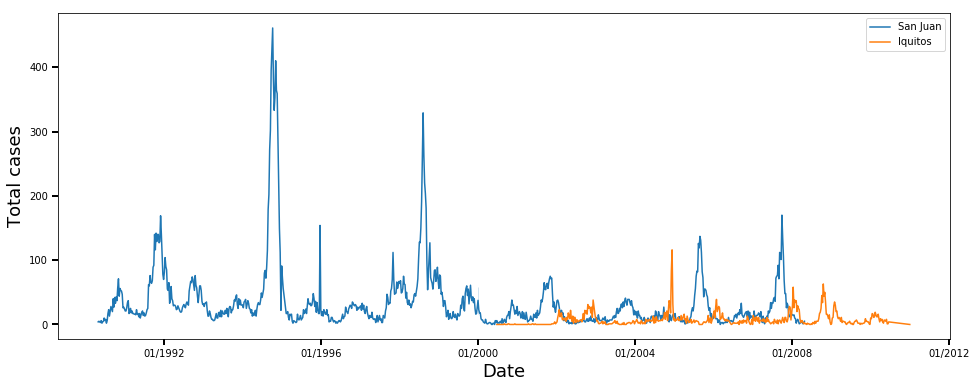

In [103]:
plt.figure(figsize=(16, 6))
cases = sns.lineplot(x='date', y='total_cases', hue='city', data=labels)
plt.xlabel('Date',  fontsize=18)
plt.ylabel('Total cases',  fontsize=18)
plt.legend(['San Juan', 'Iquitos'])
cases.xaxis.set_major_formatter(dates.DateFormatter('%m/%Y'))
plt.tick_params(direction='out', length=6, width=2, colors='black',
                   grid_color='r', grid_alpha=0.5)
# plt.savefig("../data/output/ncases.png")


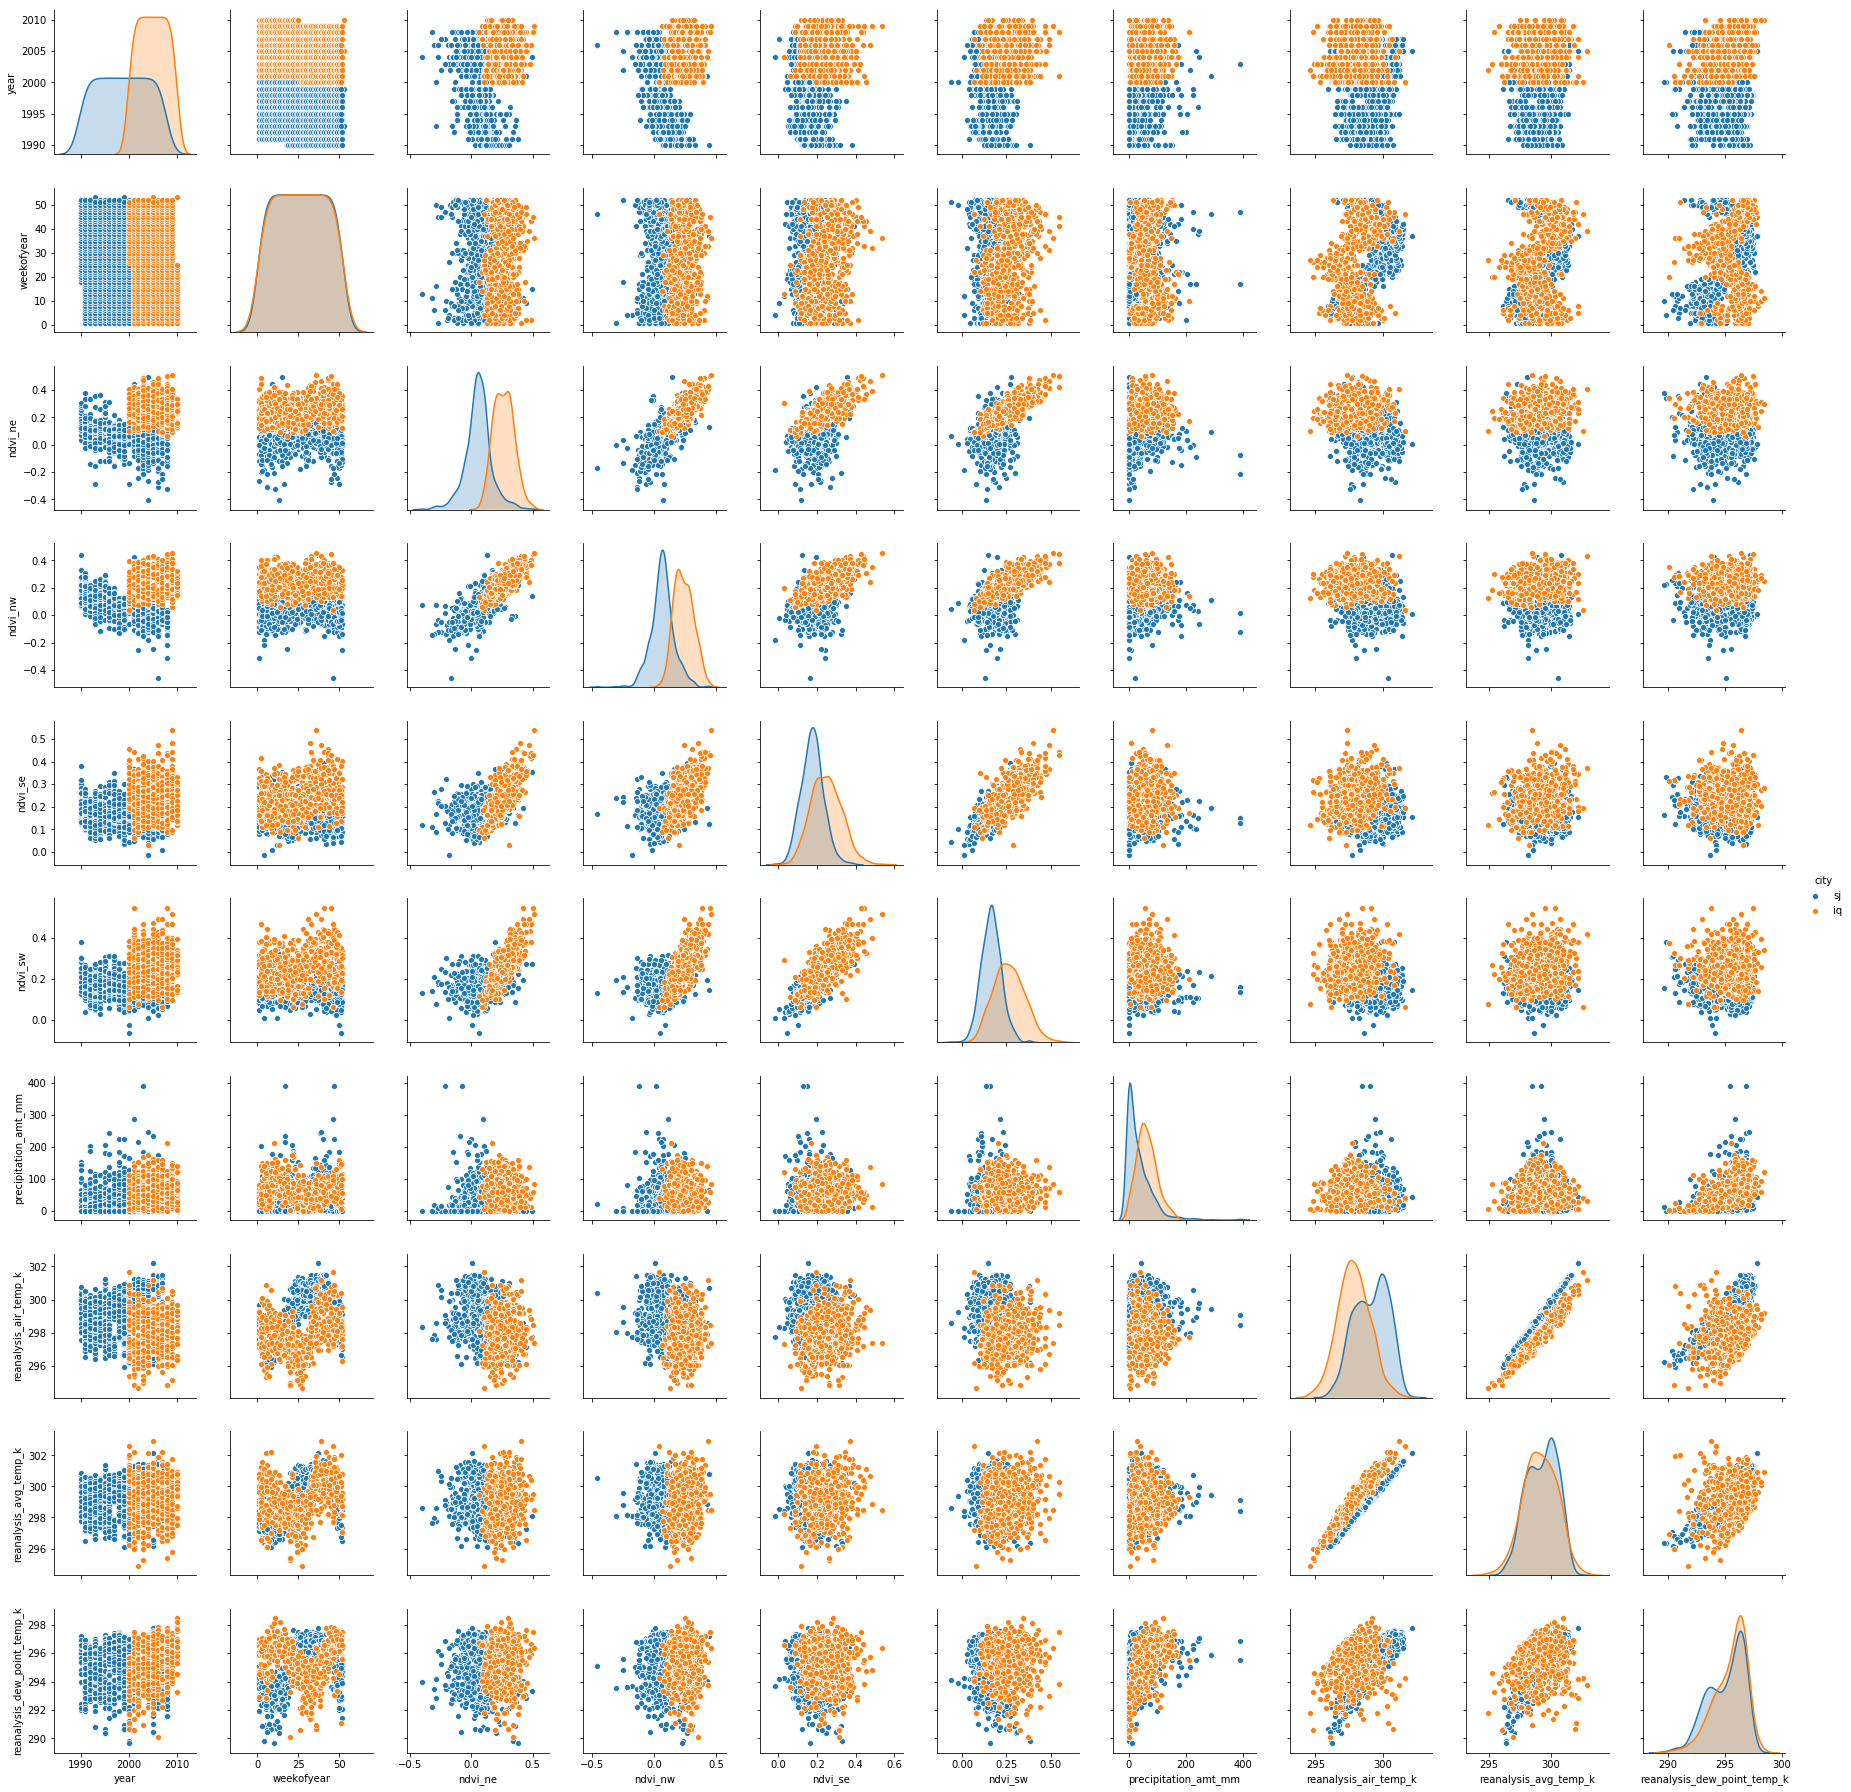

In [55]:
comp_plot = sns.pairplot(features.iloc[:, :12], hue='city')
comp_plot.savefig("../data/output/comparison.png")

There are features that are strongly correlated and there is no need to have both in the system. In addition the range of features in the two cities is quite different. we can therefore treat the two cities individually

First let deal with the NAs.

## Focus on one city: SJ

In [9]:
feature_sj = features #[features.city=='sj']
na_cols = []
for col in feature_sj.columns:
    if feature_sj[col].isna().sum() > 0:
        na_cols.append(col)

In [10]:
na_cols

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [11]:
feature_sj[na_cols].head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [12]:
feat_na = feature_sj[na_cols]
feat_na[feat_na.isna().any(axis=1)].head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
5,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
9,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1
13,NaN,0.247150,0.379700,0.381357,32.66,299.862857,299.950000,296.172857,303.0,298.3,34.60,80.584286,32.66,17.594286,2.585714,28.242857,8.085714,34.4,22.8,37.6
14,NaN,0.064333,0.164443,0.138857,28.80,300.391429,300.478571,296.532857,302.5,298.8,20.00,79.650000,28.80,17.950000,2.328571,28.200000,7.557143,33.3,23.3,11.4
15,NaN,0.128033,0.206957,0.168243,90.75,299.958571,299.957143,297.035714,302.6,298.5,101.90,84.178571,90.75,18.515714,1.857143,28.042857,6.685714,32.8,22.8,44.7


Only a few rows are cmpletely NAs. So we may use regressions to impute NAs from other columns. We could impute the values by the mean but in this case we can develop regressions to impute most columns and for columns that it will not work we will use other imputation techniques

In [13]:
corr_matrix = feature_sj.corr()
corr_matrix

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
year,1.000000,-0.071649,0.223361,0.144345,0.234234,0.277759,0.205302,-0.140016,0.085043,0.132273,...,0.132625,0.336349,0.205302,0.161596,0.490542,0.047010,0.373644,0.227320,-0.214482,0.219910
weekofyear,-0.071649,1.000000,0.053548,0.048759,0.121557,0.068701,0.118037,0.425753,0.463677,0.348946,...,0.072955,-0.015191,0.118037,0.350821,0.077933,0.368408,0.023220,0.232098,0.292362,0.066294
ndvi_ne,0.223361,0.053548,1.000000,0.850902,0.614380,0.669504,0.205736,-0.340976,-0.037682,0.056077,...,0.199411,0.457985,0.205736,0.094852,0.673935,0.186227,0.658129,0.491922,-0.315696,0.242263
ndvi_nw,0.144345,0.048759,0.850902,1.000000,0.555809,0.651938,0.193563,-0.317862,-0.030974,0.063289,...,0.190989,0.449152,0.193563,0.100626,0.645596,0.203975,0.649483,0.490122,-0.304206,0.221314
ndvi_se,0.234234,0.121557,0.614380,0.555809,1.000000,0.820924,0.074633,-0.157447,0.051348,0.002810,...,0.034792,0.215606,0.074633,0.028795,0.486047,0.089242,0.449599,0.290691,-0.251621,0.131326
ndvi_sw,0.277759,0.068701,0.669504,0.651938,0.820924,1.000000,0.124047,-0.227824,0.022533,0.020746,...,0.101652,0.311759,0.124047,0.053437,0.569554,0.121060,0.545899,0.377393,-0.294684,0.158345
precipitation_amt_mm,0.205302,0.118037,0.205736,0.193563,0.074633,0.124047,1.000000,-0.017229,0.106384,0.434722,...,0.481159,0.499984,1.000000,0.451202,0.201427,0.225408,0.193358,0.296215,0.076680,0.486637
reanalysis_air_temp_k,-0.140016,0.425753,-0.340976,-0.317862,-0.157447,-0.227824,-0.017229,1.000000,0.901777,0.529771,...,-0.128219,-0.402338,-0.017229,0.508380,-0.280375,0.619974,-0.261457,0.227768,0.719612,-0.173851
reanalysis_avg_temp_k,0.085043,0.463677,-0.037682,-0.030974,0.051348,0.022533,0.106384,0.901777,1.000000,0.614268,...,-0.031728,-0.168371,0.106384,0.612484,0.124200,0.751330,0.107581,0.512220,0.579864,-0.048052
reanalysis_dew_point_temp_k,0.132273,0.348946,0.056077,0.063289,0.002810,0.020746,0.434722,0.529771,0.614268,1.000000,...,0.432970,0.553766,0.434722,0.997051,-0.033512,0.743506,0.037151,0.492319,0.651535,0.241335


Replace NAs by the regression prediction

In [14]:
features_tuple = (('ndvi_ne', 'ndvi_nw'), ('ndvi_se', 'ndvi_sw'))
for feat in features_tuple:
    first, dependent = feat
    x = feature_sj[[first, dependent]]
    x.dropna(axis=0, inplace=True)
    y = list(x[dependent])
    x.drop(columns=[dependent], axis=1, inplace=True)
    ndvi_ne = feature_sj[[first]].dropna(axis=0)
    m = LinearRegression()
    m.fit(X=x, y=y)
    ndvi_ne = ndvi_ne.values.reshape(-1,1)
    ndvi_nw_pr = m.predict(ndvi_ne)
    
    # replace values after predicting them with linear regression
    i = 0
    for ind in feature_sj.index:
        if feature_sj.loc[ind, first] != np.nan:
            if feature_sj.loc[ind, dependent] == np.nan:
                feature_sj.loc[ind, dependent] = ndvi_nw_pr[i]
            i += 1
    print(feature_sj[dependent].isna().sum())

C:\Users\Martins\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Martins\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


52
22


C:\Users\Martins\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Martins\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


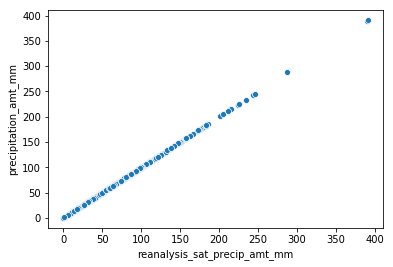

In [15]:
sns.scatterplot('reanalysis_sat_precip_amt_mm', 'precipitation_amt_mm', data=feature_sj)

In [16]:
feature_sj.shape

(1456, 24)

Find the columns that are strongly correlated

In [17]:
# 
def find(l:list, val:str):
    for lst in l:
        if val in lst:
            return lst
    return None
correlated = []
for i, col in enumerate(corr_matrix.columns[2:]):
    for j, ind in enumerate(corr_matrix.index[2:]):
        corr = corr_matrix.loc[ind, col]
        if i < j and abs(corr) > .5:
            res = find(correlated, col)
            if res is not None:
                # replace if necessary
                if abs(res[2]) < abs(corr):
                    correlated.remove(res)
                    correlated.append([ind, col, corr])
            else:
                correlated.append([ind, col, corr])
                
            

In [18]:
correlated

[['ndvi_nw', 'ndvi_ne', 0.8509019513097038],
 ['ndvi_sw', 'ndvi_se', 0.8209243747914347],
 ['reanalysis_sat_precip_amt_mm', 'precipitation_amt_mm', 1.0],
 ['reanalysis_avg_temp_k', 'reanalysis_air_temp_k', 0.9017774447167691],
 ['reanalysis_specific_humidity_g_per_kg',
  'reanalysis_dew_point_temp_k',
  0.9970512932011403],
 ['reanalysis_tdtr_k', 'reanalysis_max_air_temp_k', 0.9185782576923701],
 ['reanalysis_tdtr_k', 'reanalysis_min_air_temp_k', -0.815511196419778],
 ['reanalysis_relative_humidity_percent',
  'reanalysis_precip_amt_kg_per_m2',
  0.5939279489584282],
 ['station_max_temp_c', 'station_avg_temp_c', 0.7645762966300058],
 ['station_max_temp_c', 'station_diur_temp_rng_c', 0.7152169440660853]]

Drop columns with most of NAs

In [19]:
# compute columns to drop
col_drop = \
[tripet[0] if feature_sj[triplet[0]].isna().sum() > feature_sj[triplet[1]].isna().sum()\
 else triplet[1] for triplet in correlated]

# drop the column
feature_sj_dr = feature_sj.drop(col_drop, axis=1)

In [20]:
feature_sj_dr.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_nw', 'ndvi_sw',
       'reanalysis_avg_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
       'reanalysis_tdtr_k', 'station_max_temp_c', 'station_min_temp_c',
       'station_precip_mm'],
      dtype='object')

In [21]:
feature_sj_dr.corr()

,year,weekofyear,ndvi_nw,ndvi_sw,reanalysis_avg_temp_k,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_max_temp_c,station_min_temp_c,station_precip_mm
year,1.000000,-0.071649,0.144345,0.277759,0.085043,0.336349,0.205302,0.161596,0.490542,0.227320,-0.214482,0.219910
weekofyear,-0.071649,1.000000,0.048759,0.068701,0.463677,-0.015191,0.118037,0.350821,0.077933,0.232098,0.292362,0.066294
ndvi_nw,0.144345,0.048759,1.000000,0.651938,-0.030974,0.449152,0.193563,0.100626,0.645596,0.490122,-0.304206,0.221314
ndvi_sw,0.277759,0.068701,0.651938,1.000000,0.022533,0.311759,0.124047,0.053437,0.569554,0.377393,-0.294684,0.158345
reanalysis_avg_temp_k,0.085043,0.463677,-0.030974,0.022533,1.000000,-0.168371,0.106384,0.612484,0.124200,0.512220,0.579864,-0.048052
reanalysis_relative_humidity_percent,0.336349,-0.015191,0.449152,0.311759,-0.168371,1.000000,0.499984,0.577813,0.360026,0.395935,-0.042639,0.450741
reanalysis_sat_precip_amt_mm,0.205302,0.118037,0.193563,0.124047,0.106384,0.499984,1.000000,0.451202,0.201427,0.296215,0.076680,0.486637
reanalysis_specific_humidity_g_per_kg,0.161596,0.350821,0.100626,0.053437,0.612484,0.577813,0.451202,1.000000,0.012948,0.519376,0.623155,0.255836
reanalysis_tdtr_k,0.490542,0.077933,0.645596,0.569554,0.124200,0.360026,0.201427,0.012948,1.000000,0.613477,-0.451940,0.232783
station_max_temp_c,0.227320,0.232098,0.490122,0.377393,0.512220,0.395935,0.296215,0.519376,0.613477,1.000000,0.140521,0.167098


I choose for this analysis to drop all rows with NAs altogether

In [22]:
feature_sj_dr.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_nw                                  float64
ndvi_sw                                  float64
reanalysis_avg_temp_k                    float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_max_temp_c                       float64
station_min_temp_c                       float64
station_precip_mm                        float64
dtype: object

In [23]:
feature_sj_dr = feature_sj_dr.astype({'city': 'category', 'year': 'category', 
                                      'weekofyear': 'category', 'week_start_date': 'datetime64[ns]'}, copy=False) # change data type
feature_sj_dr['week_start_date'] = feature_sj_dr.week_start_date.values.astype('float64') // 10**9
scaler = MinMaxScaler()
col_to_norm = [col for col in feature_sj_dr.columns if feature_sj_dr[col].dtypes == np.float64]
norm = scaler.fit_transform(feature_sj_dr[col_to_norm])
feature_sj_dr[col_to_norm] = norm

# ['ndvi_nw', 'ndvi_sw',
#        'reanalysis_avg_temp_k', 'reanalysis_precip_amt_kg_per_m2',
#        'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
#        'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c',
#        'station_precip_mm']

In [24]:
feature_sj_dr.head()

,city,year,weekofyear,week_start_date,ndvi_nw,ndvi_sw,reanalysis_avg_temp_k,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,0.000000,0.614835,0.395544,0.354667,0.381614,0.031797,0.262659,0.086660,0.174194,0.486239,0.029450
1,sj,1990,19,0.000951,0.657063,0.359233,0.441778,0.479668,0.058423,0.418164,0.069133,0.322581,0.688073,0.015829
2,sj,1990,20,0.001902,0.690881,0.384430,0.496000,0.594415,0.088428,0.586900,0.064265,0.354839,0.743119,0.076201
3,sj,1990,21,0.002853,0.770066,0.491150,0.539556,0.552387,0.039324,0.566808,0.073028,0.425806,0.788991,0.007362
4,sj,1990,22,0.003804,0.788882,0.509943,0.593778,0.555396,0.019252,0.628226,0.112950,0.535484,0.844037,0.010676


In [25]:
# lab_sj = labels[features['city']=='sj']
all_sj = feature_sj_dr
labels = labels.astype({'city': 'category', 'year': 'category', 'weekofyear': 'category'}, copy=False) 
all_sj = pd.merge(labels, all_sj, on=('city', 'year', 'weekofyear'), how='inner')

In [26]:
all_sj.dropna(axis=0, inplace=True)

In [27]:
all_sj.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_nw,ndvi_sw,reanalysis_avg_temp_k,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,0.000000,0.614835,0.395544,0.354667,0.381614,0.031797,0.262659,0.086660,0.174194,0.486239,0.029450
1,sj,1990,19,5,0.000951,0.657063,0.359233,0.441778,0.479668,0.058423,0.418164,0.069133,0.322581,0.688073,0.015829
2,sj,1990,20,4,0.001902,0.690881,0.384430,0.496000,0.594415,0.088428,0.586900,0.064265,0.354839,0.743119,0.076201
3,sj,1990,21,3,0.002853,0.770066,0.491150,0.539556,0.552387,0.039324,0.566808,0.073028,0.425806,0.788991,0.007362
4,sj,1990,22,6,0.003804,0.788882,0.509943,0.593778,0.555396,0.019252,0.628226,0.112950,0.535484,0.844037,0.010676


In [28]:
l = list(all_sj.columns)
l.remove(all_sj.columns[3])
# l.remove(all_sj.columns[0])

In [29]:
X = all_sj[l]
y = all_sj[all_sj.columns[3]]

X.dropna(axis=0, inplace=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

C:\Users\Martins\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
X.dtypes

city                                     category
year                                     category
weekofyear                               category
week_start_date                           float64
ndvi_nw                                   float64
ndvi_sw                                   float64
reanalysis_avg_temp_k                     float64
reanalysis_relative_humidity_percent      float64
reanalysis_sat_precip_amt_mm              float64
reanalysis_specific_humidity_g_per_kg     float64
reanalysis_tdtr_k                         float64
station_max_temp_c                        float64
station_min_temp_c                        float64
station_precip_mm                         float64
dtype: object

In [31]:
import lightgbm as lgb

In [32]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train, 
                        feature_name = list(X_train.columns), 
                        categorical_feature = 'auto', #['year', 'weekofyear', 'week_start_date']
)
lgb_val = lgb.Dataset(X_val, y_val, 
                        feature_name = list(X_val.columns), 
                        categorical_feature = 'auto', #['year', 'weekofyear', 'week_start_date']
)

In [33]:
# list(features.columns[3:])

In [34]:
params = {
 'task': 'train',
  'boosting_type': 'gbdt',
  'min_chile_samples': 5,
  'num_leaves': 31,
  'n_estimators': 200,
  'objective': 'regression', # if is_regression == True else 'multiclass',
  'metric': 'rmsle', #'rmsle', # if is_regression == True else 'multi_logloss',
  'min_data': 1,
  'verbose': -1
}
 
gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=[lgb_val, lgb_train], valid_names=['eval', 'train'])

C:\Users\Martins\Anaconda3\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Martins\Anaconda3\lib\site-packages\lightgbm\basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


In [35]:
predictions = gbm.predict(X_test)

In [50]:
predictions = gbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(predictions, y_test))
r2 = r2_score(predictions, y_test)

print(f'R2 score = {r2} and RMSE = {rmse}')

SyntaxError: invalid syntax (<fstring>, line 1)

In [37]:
y_test[:2]

324    16
484    44
Name: total_cases, dtype: int64

In [38]:
x_svd = X.values[:, 3:]
x_svd = x_svd.astype(float)
u, s, v = svd(x_svd, full_matrices=False)

In [39]:
pca = PCA()
pca.fit(X.values[:, 1:])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.explained_variance_ 

array([2.21933562e+02, 2.85559894e+01, 7.52610489e-02, 5.63437620e-02,
       2.99893943e-02, 1.26931406e-02, 8.78531717e-03, 5.19832560e-03,
       4.80061595e-03, 4.19164263e-03, 3.69043693e-03, 1.91212460e-04,
       6.94161012e-06])

In [41]:
np.cumsum(pca.explained_variance_ratio_ )

array([0.88528836, 0.99919761, 0.99949782, 0.99972258, 0.99984221,
       0.99989284, 0.99992788, 0.99994862, 0.99996777, 0.99998449,
       0.99999921, 0.99999997, 1.        ])

In [42]:
pca.components_.shape

(13, 13)

In [43]:
pca.singular_values_

array([5.51808705e+02, 1.97936398e+02, 1.01616022e+01, 8.79224894e+00,
       6.41447183e+00, 4.17312699e+00, 3.47180863e+00, 2.67059969e+00,
       2.56640704e+00, 2.39811044e+00, 2.25017321e+00, 5.12194782e-01,
       9.75904149e-02])

In [44]:
svd([[1., 2., 3.], [2,3, 3], [3, 1, 0]])

(array([[-0.57455027, -0.39126434, -0.71889095],
        [-0.74853662, -0.10405717,  0.65487787],
        [-0.33103612,  0.91437647, -0.23308961]]),
 array([6.24730333, 2.614627  , 0.36732367]),
 array([[-0.49056876, -0.59637676, -0.63535584],
        [ 0.8199069 , -0.06896729, -0.56832754],
        [-0.29511857,  0.79973638, -0.52280662]]))

In [45]:
s

array([60.35993684, 11.37959447,  7.88000525,  6.74035743,  5.69097235,
        3.51102598,  3.17779995,  2.57311978,  2.44055495,  2.27795678,
        1.01331675])

In [46]:
# ! conda update -c anaconda numpy --yes

In [47]:
ncomp = 4
v = v.T
X_hat = x_svd.dot(v[:, :ncomp])

In [48]:
np.shape(X_hat)

(1373, 4)